In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 


In [2]:
import os
from os.path import join
import pandas as pd
from src.config import RESULTS, FIGURES_DIR, ROOT_DIR
from src.calculate_AF_by_cell import calculate_af
#ref_fa = "/data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/fasta/genome.fa"
#ref_fa="/data2/mito_lineage/BWA-Primers-MT/MT_genome/MT.fasta"
maxBP = 16571


import numpy as np

Project Directory: /data2/mito_lineage


In [3]:
from matplotlib_venn import venn2

import seaborn as sns
import matplotlib.pyplot as plt

from mplh import cluster_help

fig_utils from mplh
here


In [4]:
os.chdir(ROOT_DIR)

## Files setup

In [5]:
indir=join(RESULTS,"mttrace")
in_prefix = '2020_11_18'
mapq = "mapq_0"
num_reads = 200
pbmc_j = "PBMC_J"
pbmc_p = "PBMC_P"



pbmc_j_indir = join(indir, in_prefix, pbmc_j,"mapq_0")
pbmc_p_indir = join(indir, in_prefix, pbmc_p,"mapq_0")

# sc_coverage_pbmc_j_f = join(pbmc_j_indir,"scPileup_concat_200",pbmc_j+"_200_all.coverage.txt.gz")
# sc_coverage_pbmc_p_f = join(pbmc_p_indir,"scPileup_concat_200",pbmc_p + "_200_all.coverage.txt.gz")

coverage_pbmc_j_dir = join(pbmc_j_indir,pbmc_j+"_scPileup_200")
coverage_pbmc_p_dir = join(pbmc_p_indir,pbmc_p+"_scPileup_200")

concat_pbmc_j_dir = join(pbmc_j_indir,"scPileup_concat_200")
concat_pbmc_p_dir = join(pbmc_p_indir,"scPileup_concat_200")

In [6]:
min_cells=100
min_reads=10
topN=0
min_het_cells=10
het_thresh=0.2

In [7]:
from src.utils.parse_config import read_config_file
p = read_config_file("parameters/2020_11_18_Croker_mito.yaml")

mt_ref_fa = p["mt_ref_fa"]

In [8]:
dirname = f"minC{min_cells}_minR{min_reads}_topN{topN}_hetC{min_het_cells}_hetT{het_thresh}"
outdir = join(indir, f"lineage_trace/{in_prefix}/PBMC_P/report", dirname)
if not os.path.exists(outdir):
    os.makedirs(outdir)
outdir

'/data2/mito_lineage/data/processed/mttrace/lineage_trace/2020_11_18/PBMC_P/report/minC100_minR10_topN0_hetC10_hetT0.2'

### Create allele frequency matrix for both, but add metadata for each cell about which experiment it came from
### Cluster and look

### Additional requirements is to remove poor-quality variants of BQ- see if Erick has the code of the mixture model

In [9]:
print(mt_ref_fa)
print(maxBP)
print(coverage_pbmc_p_dir)
print(concat_pbmc_p_dir)

/data2/mito_lineage/data/external/GRCh38_MT_blacklist/chrM.fasta
16571
/data2/mito_lineage/data/processed/mttrace/2020_11_18/PBMC_P/mapq_0/PBMC_P_scPileup_200
/data2/mito_lineage/data/processed/mttrace/2020_11_18/PBMC_P/mapq_0/scPileup_concat_200


In [11]:
pbmc_p_AF_by_cell, pbmc_p_BQ_by_cell, pbmc_p_af, pbmc_p_bq_df, pbmc_p_nt_df = calculate_af(coverage_pbmc_p_dir, concat_pbmc_p_dir, ref_fasta=mt_ref_fa, 
                                                                                           AF_F=None, maxBP=maxBP, topN=topN, min_cells=min_cells, min_reads=min_reads, 
                                                                                           min_het_cells=min_het_cells, het_thresh=het_thresh)

no alt count 1
topN 0
Number of positions to keep : 16569
Number of cells to keep : 3266
coverage not found for ACTACGACATCACAGT-1
T not found for ATTACCTTCTTAAGCG-1
G not found for ATTACTCAGTAGCAAT-1
G not found for TGCTCACAGGACTTTC-1
G not found for GCGATTAGTACTTCAG-1
T not found for GAGCATTCATCCTCGT-1
A not found for CTAACTTGTGGAAGCT-1
coverage not found for TACGCCTTCTCCCTTT-1
T not found for AGGCGTCCACGCGCAT-1
coverage not found for TTGCTTAAGGTCGGTA-1
C not found for AACGTACTCAGGGTTT-1
T not found for AGCTGGCCAATTCGTG-1
T not found for TTGTTCAGTCTAAAGA-1
A not found for AACCAACCAAGGCGTA-1
T not found for ACTATTCAGACTCTTG-1
coverage not found for GGTGTCGGTGTGTGTT-1
C not found for GGAGGATTCCGGAAAG-1
G not found for TTACTCATCCCAGCAG-1
coverage not found for GTAGACTCAATGATGA-1
A not found for TAGCGGCAGTGTCCCG-1
C not found for ACCAAACTCGAGGCTC-1
G not found for CTCCCAAGTCCCTAAA-1
G not found for ACAGAAAGTTCTTTGT-1
G not found for TGTGACAGTCAGTGCC-1
coverage not found for ACTACGACATCAC

In [12]:
print(f"Number of positions with heteroplasmy fraction above 0: {(pbmc_p_AF_by_cell>0).any(axis=0).sum()}")

Number of positions with heteroplasmy fraction above 0: 243


cmap None


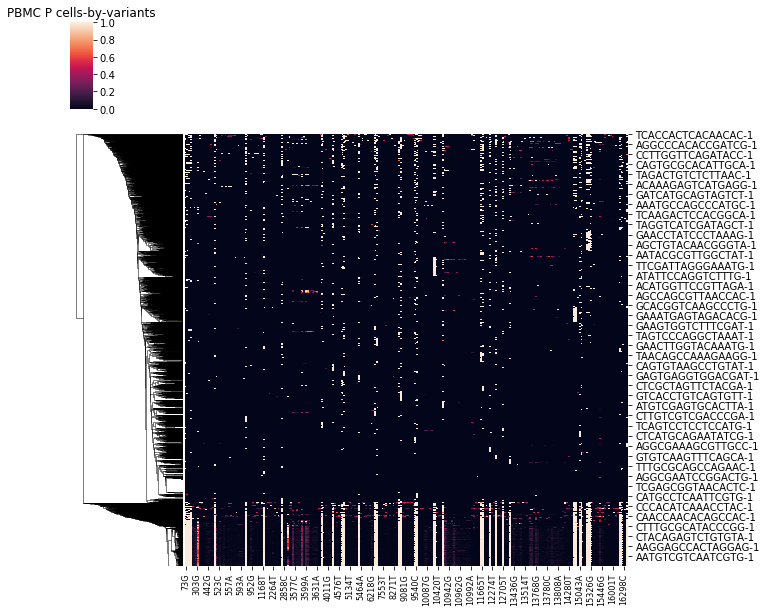

In [16]:
%matplotlib inline
cluster_help.plot_cluster(df=pbmc_p_AF_by_cell, row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.title("PBMC P cells-by-variants")
plt.savefig(join(outdir,"pbmc_p_variants.png"))

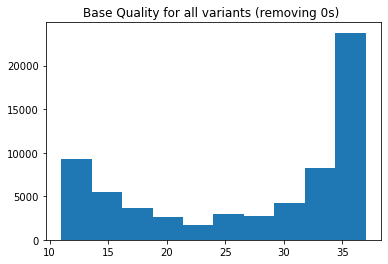

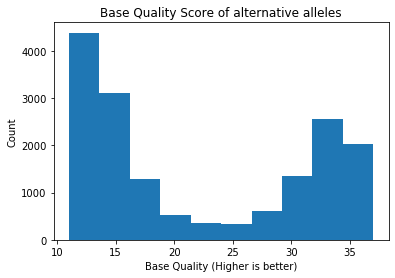

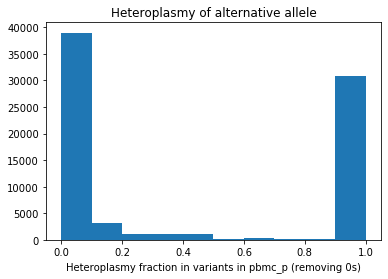

In [17]:
%matplotlib inline
f = plt.figure()
bq_vals = pbmc_p_bq_df.values.flatten()
plt.hist(bq_vals[bq_vals>0])
plt.title("Base Quality for all variants (removing 0s) ")
plt.savefig(join(outdir, "pbmc_p_base_quality.png"))

plt.figure()
plt.hist(pbmc_p_af["Alternative BQ"])
plt.title("Base Quality Score of alternative alleles")
plt.xlabel("Base Quality (Higher is better)")
plt.ylabel("Count")
plt.savefig(join(outdir, "pbmc_p_base_quality_altAllele.png"))


f = plt.figure()
af_vals = pbmc_p_AF_by_cell.values.flatten()
plt.hist(af_vals[af_vals>0])
plt.title("Heteroplasmy of alternative allele")
plt.xlabel("Heteroplasmy fraction in variants in pbmc_p (removing 0s)")
plt.savefig(join(outdir, "pbmc_p_heteroplasmy_values.png"))


# pbmc_j

In [18]:
pbmc_j_AF_by_cell, pbmc_j_BQ_by_cell, pbmc_j_af, pbmc_j_bq_df, pbmc_j_nt_df = calculate_af(coverage_pbmc_j_dir, concat_pbmc_j_dir, ref_fasta=mt_ref_fa,
                                                                                           AF_F=None, maxBP=maxBP, topN=topN, 
                                                                                           min_cells=min_cells, min_reads=min_reads,
                                                                                           min_het_cells=min_het_cells, het_thresh=het_thresh)

no alt count 3
topN 0
Number of positions to keep : 16569
Number of cells to keep : 2744
Positions that pass het filter: 241


cmap None


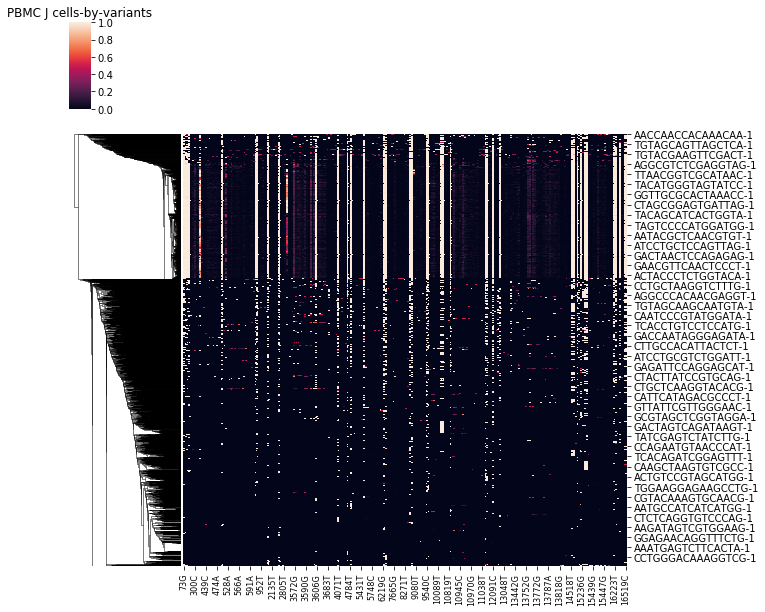

In [19]:
%matplotlib inline
cluster_help.plot_cluster(df=pbmc_j_AF_by_cell, row_meta=None, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.title("PBMC J cells-by-variants")
plt.savefig(join(outdir,"pbmc_j_variants.png"))

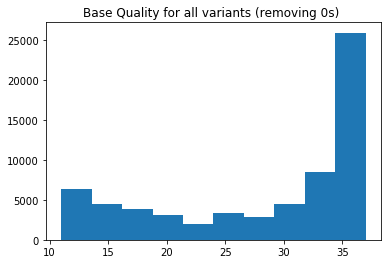

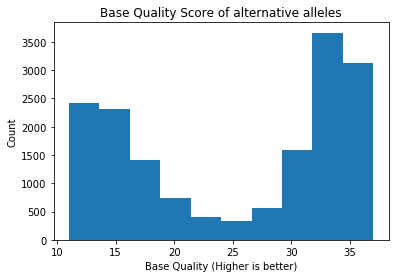

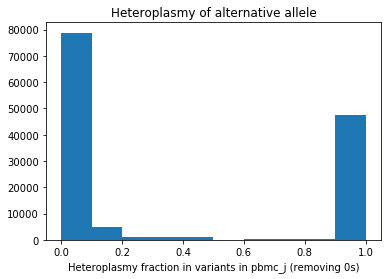

In [20]:
%matplotlib inline
f = plt.figure()
bq_vals = pbmc_j_bq_df.values.flatten()
plt.hist(bq_vals[bq_vals>0])
plt.title("Base Quality for all variants (removing 0s) ")
plt.savefig(join(outdir, "pbmc_j_base_quality.png"))

plt.figure()
plt.hist(pbmc_j_af["Alternative BQ"])
plt.title("Base Quality Score of alternative alleles")
plt.xlabel("Base Quality (Higher is better)")
plt.ylabel("Count")
plt.savefig(join(outdir, "pbmc_j_base_quality_altAllele.png"))


f = plt.figure()
af_vals = pbmc_j_AF_by_cell.values.flatten()
plt.hist(af_vals[af_vals>0])
plt.title("Heteroplasmy of alternative allele")
plt.xlabel("Heteroplasmy fraction in variants in pbmc_j (removing 0s)")
plt.savefig(join(outdir, "pbmc_j_heteroplasmy_values.png"))


## Merge the two 

In [21]:
pbmc_j_AF_by_cell.index = pbmc_j_AF_by_cell.index + "_pbmc_j"
pbmc_p_AF_by_cell.index = pbmc_p_AF_by_cell.index + "_pbmc_p"


In [22]:
all_cells = pd.concat((pbmc_p_AF_by_cell,pbmc_j_AF_by_cell) ,axis=1)


/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [23]:
all_cells_var_overlap = pd.concat((pbmc_p_AF_by_cell,pbmc_j_AF_by_cell) ,axis=0, join='inner')
overlap_variants = all_cells_var_overlap.columns.values
all_cells_var_overlap


,73G,146C,199C,263G,300C,303G,310C,337T,439C,442G,...,15448G,15534T,15871T,15880T,16013T,16223T,16295T,16298C,16362C,16519C
TCGAGCGGTTACTTTC-1_pbmc_p,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GGTGAAGAGGCAAGCT-1_pbmc_p,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CACCACTTCCCTACCA-1_pbmc_p,1.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CTGAATGAGTCAGCCC-1_pbmc_p,0.0,0.0,0.0,1.0,0.25,0.0,0.666667,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTCAGCTAGGGTGTTG-1_pbmc_p,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACCGCAGTCGACGGAA-1_pbmc_j,1.0,1.0,1.0,1.0,0.00,0.0,1.000000,0.0,1.0,0.0,...,0.166667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
CTCTAGCTCTTAAGCG-1_pbmc_j,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
GTCCATCGTTTCCACC-1_pbmc_j,1.0,1.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
TAGGTCAAGTAGCAAT-1_pbmc_j,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


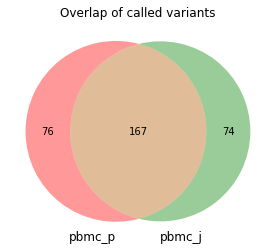

In [24]:
%matplotlib inline
venn2([set(pbmc_p_AF_by_cell.columns.values),set(pbmc_j_AF_by_cell.columns.values)],set_labels=["pbmc_p","pbmc_j"])
plt.title("Overlap of called variants")
plt.savefig(join(outdir,"overlap_variants_with_without_ligand.png"))

## Plot the lineage tracing 

### With only the overlapping variants

In [25]:
all_cells_var_overlap = all_cells_var_overlap.drop((all_cells_var_overlap==0).all(axis=0).where(lambda x: x==True).dropna().index,axis=1)

all_cells_var_overlap = all_cells_var_overlap.drop((all_cells_var_overlap==0).all(axis=1).where(lambda x: x==True).dropna().index,axis=0)

In [26]:
row_meta = pd.concat((pd.DataFrame(index=pbmc_j_AF_by_cell.index, data={"Sample":["pbmc_j"]*pbmc_j_AF_by_cell.index.shape[0]}),
           pd.DataFrame(index= pbmc_p_AF_by_cell.index, data={"Sample":["pbmc_p"]*pbmc_p_AF_by_cell.index.shape[0]})))
row_meta = row_meta.loc[all_cells_var_overlap.index]
row_meta

,Sample
TCGAGCGGTTACTTTC-1_pbmc_p,pbmc_p
GGTGAAGAGGCAAGCT-1_pbmc_p,pbmc_p
CACCACTTCCCTACCA-1_pbmc_p,pbmc_p
CTGAATGAGTCAGCCC-1_pbmc_p,pbmc_p
CTCAGCTAGGGTGTTG-1_pbmc_p,pbmc_p
...,...
ACCGCAGTCGACGGAA-1_pbmc_j,pbmc_j
CTCTAGCTCTTAAGCG-1_pbmc_j,pbmc_j
GTCCATCGTTTCCACC-1_pbmc_j,pbmc_j
TAGGTCAAGTAGCAAT-1_pbmc_j,pbmc_j


cmap None


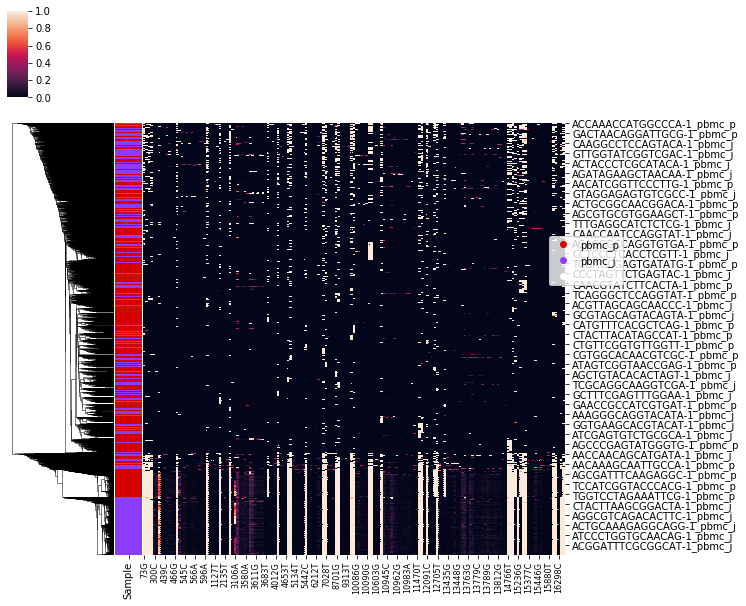

In [27]:
%matplotlib inline
cluster_help.plot_cluster(df=all_cells_var_overlap, row_meta=row_meta, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.savefig(join(outdir,"lineage_OnlyoverlapVariants.png"))

cmap None


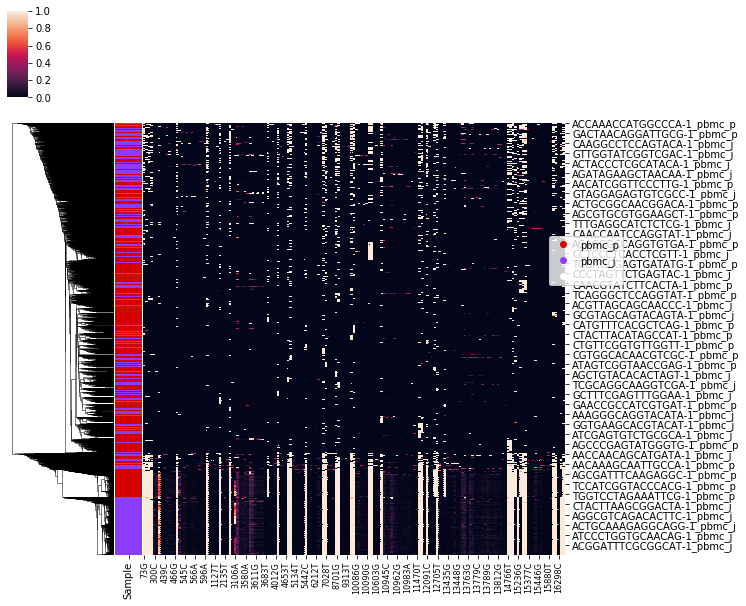

In [28]:
cluster_help.plot_cluster(df=all_cells_var_overlap, row_meta=row_meta, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)

## Plot number of overlapping positions from pbmc_j and without

### With all variants

cmap None


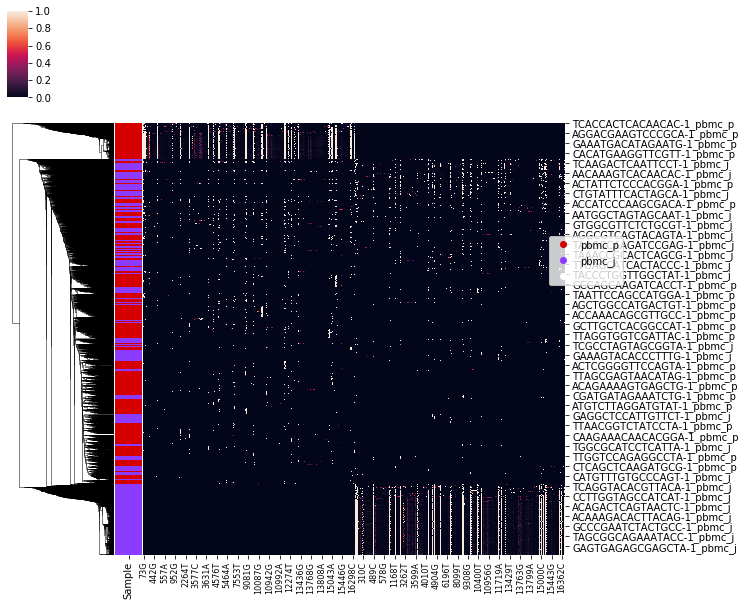

In [29]:
all_cells = all_cells.fillna(0)
all_cells = all_cells.drop((all_cells==0).all(axis=0).where(lambda x: x==True).dropna().index,axis=1)

all_cells = all_cells.drop((all_cells==0).all(axis=1).where(lambda x: x==True).dropna().index,axis=0)

# row_meta = pd.concat((pd.DataFrame(index=pbmc_j_cell, data={"Sample":["pbmc_j"]*pbmc_j_cell.shape[0]}),
#            pd.DataFrame(index=pbmc_p_cell, data={"Sample":["pbmc_p"]*pbmc_p_cell.shape[0]})))
# row_meta = row_meta.loc[all_cells.index]

row_meta = pd.concat((pd.DataFrame(index=pbmc_j_AF_by_cell.index, data={"Sample":["pbmc_j"]*pbmc_j_AF_by_cell.index.shape[0]}),
           pd.DataFrame(index= pbmc_p_AF_by_cell.index, data={"Sample":["pbmc_p"]*pbmc_p_AF_by_cell.index.shape[0]})))
row_meta = row_meta.loc[all_cells.index]
row_meta


g = cluster_help.plot_cluster(df=all_cells, row_meta=row_meta, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)
plt.savefig(join(outdir,"lineage_AllVariants.png"))

cmap None


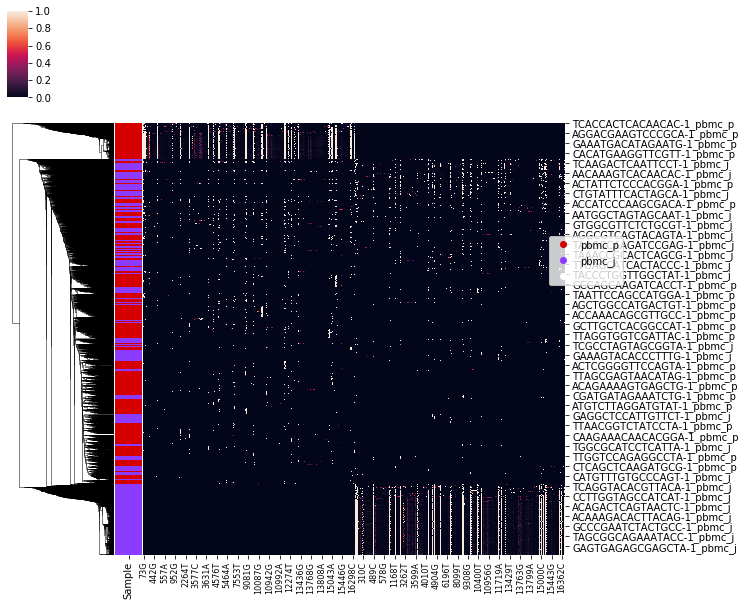

In [31]:
g = cluster_help.plot_cluster(df=all_cells, row_meta=row_meta, col_meta=None,
                 fsave=None, to_z=False, to_col_clust=False,
                 to_row_clust=True, name=None, col_names=True,
                 row_names=True, to_legend=True, method="average", white_name=None)


## Scatter the average AF in both samples for each position 


[   73   146   199   263   300   302   303   310   337   361   426   439
   442   449   456   466   489   515   523   539   541   545   548   552
   557   566   568   583   586   588   593   596   601   750   783   784
   952   955   978   998  1037  1127  1168  1438  1900  2052  2135  2181
  2264  2507  2514  2617  2669  2706  2858  3030  3106  3282  3289  3572
  3577  3578  3580  3585  3590  3597  3599  3605  3611  3614  3616  3622
  3631  3677  3683  3882  3995  4010  4011  4012  4013  4071  4258  4317
  4576  4653  4769  4850  4874  4918  5134  5286  5287  5431  5432  5442
  5464  5640  5676  5752  5836  6212  6218  6219  6455  7028  7397  7532
  7553  7617  7665  7860  8099  8237  8271  8514  8537  8701  8860  9080
  9081  9242  9308  9313  9314  9503  9540  9824 10052 10080 10083 10086
 10087 10088 10089 10090 10398 10400 10420 10603 10819 10873 10935 10941
 10942 10945 10946 10953 10956 10959 10962 10966 10970 10977 10983 10989
 10992 11037 11038 11378 11470 11597 11665 11719 11

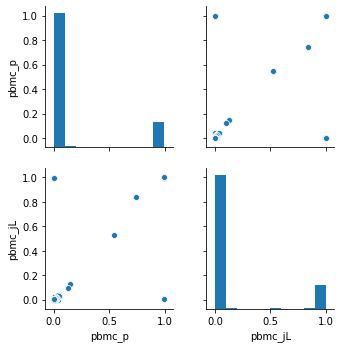

In [32]:
#pd.concat((pbmc_p_af, pbmc_j_af))
import numpy as np
overlap_inds = np.array(list(map(lambda x: int(x[:-1]), all_cells.columns)))
print(overlap_inds)
merged_af = pd.DataFrame({"pbmc_p":pbmc_p_af.loc[overlap_inds,"AF"], "pbmc_jL":pbmc_j_af.loc[overlap_inds, "AF"]})
merged_af = merged_af.fillna(0)
sns.pairplot(merged_af)
plt.savefig(join(outdir, "heteroplasmy_across_samples"))

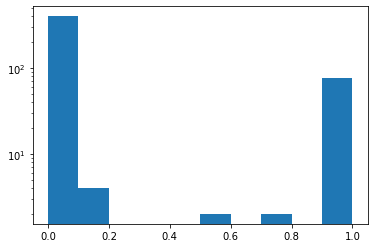

In [33]:
plt.hist((merged_af['pbmc_p'].astype(float)))
plt.yscale('log')